In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan, acos
from scipy import ndimage

ModuleNotFoundError: No module named 'cv2'

In [2]:
image_path = "../Test_Images/"

base = "Base.JPG"
b1 = "Backwards1.JPG"
b2 = "Backwards2.jpg"
s1 = "Sideways1.JPG"
s2 = "Sideways2.JPG"
W1 = "WHall1.JPG"
W2 = "WCenter2.JPG"
W3 = "WDesk3.JPG"
W4 = "WBlinds4.JPG"

sample_path = image_path + base
sample_path

'../Test_Images/Base.JPG'

In [17]:
def sind(x):
    return sin(np.deg2rad(x))

def cosd(x):
    return cos(np.deg2rad(x))

def tand(x):
    return tan(np.deg2rad(x))

def acosd(x):
    return np.rad2deg(acos(x))

"""
# CANONICAL ROTATION MATRICES
def R_yaw(alpha):
    return np.array([[1, 0, 0],
           [0, cosd(alpha), -sind(alpha)],
           [0, sind(alpha), cosd(alpha)]])

def R_pitch(beta):
    return np.array([[cosd(beta), 0, sind(beta)],
          [0, 1, 0],
          [-sind(beta), 0, cosd(beta)]])

# roll
def R_roll(gamma):
    return np.array([[cosd(gamma), -sind(gamma), 0],
           [sind(gamma), cosd(gamma), 0],
           [0, 0, 1]])

def get_tot_R(R_alpha, R_beta, R_gamma):
    return R_gamma*R_beta*R_alpha
"""

def f_plot(img, dst, num=1):
    f = plt.figure(figsize=(20,8))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(img)
    ax.set_title('Image ' + str(num))
    ax2.imshow(dst)
    ax2.set_title('Output ' + str(num))
    plt.show()

print("Loaded successfully")

Loaded successfully


# Purpose
> The purpose of this entire NB is to automatically place all captured images into the same fixed world frame.  

## Simulating Using Self-Captured Images
> Namely, with the examples below of my wallet and room, my wallet acts as the landing site (when the nose cone is at a 30 degree angle, the landing site will always be in the view, in the lower half the of the image). The goal of this is to manually rotate the "3D" images to prove it can be done in the desired way (e.g. keeping the wallet at the bottom but moving the top half (the hallway, desk, etc which changes with camera angle) to its "correct" place in 3D space.  Explicitly, we want the wallet at the bottom, and the "top" to

In [14]:
img1 = cv2.imread(image_path+W1)
img2 = cv2.imread(image_path+W2)
img3 = cv2.imread(image_path+W3)
img4 = cv2.imread(image_path+W4)
# All should have the same shape
rows,cols,ch = img1.shape

In [50]:
pts1 = np.float32([[0,500],[2500,2000],[1000,4000],[3000,4000]]) 
# This makes a pretty nice 90* turn for the 2nd image
pts2 = np.float32([[0,2500],[0,4000],[3000,2500],[3000,4000]]) 
pts3 = np.float32([[0,2500],[0,4000],[3000,2500],[3000,4000]]) 
pts4 = np.float32([[0,0],[3000,0],[0,4000],[3000,4000]]) 

pts_ = np.float32([[0,0],[300,0],[0,300],[300,300]])

M1 = cv2.getPerspectiveTransform(pts1,pts_)
M2 = cv2.getPerspectiveTransform(pts2,pts_)
M3 = cv2.getPerspectiveTransform(pts3,pts_)
M4 = cv2.getPerspectiveTransform(pts4,pts_)

dst1 = cv2.warpPerspective(img1,M1,(300,300))
dst2 = cv2.warpPerspective(img2,M2,(300,300))
dst3 = cv2.warpPerspective(img3,M3,(300,300))
dst4 = cv2.warpPerspective(img4,M4,(300,300))

In [51]:
M4

array([[ 0.1  ,  0.   ,  0.   ],
       [ 0.   ,  0.075,  0.   ],
       [-0.   , -0.   ,  1.   ]])

The following was just for my own verification, shows that we can keep the image the exact same but "downsample" from 3000x4000 to 300x300.

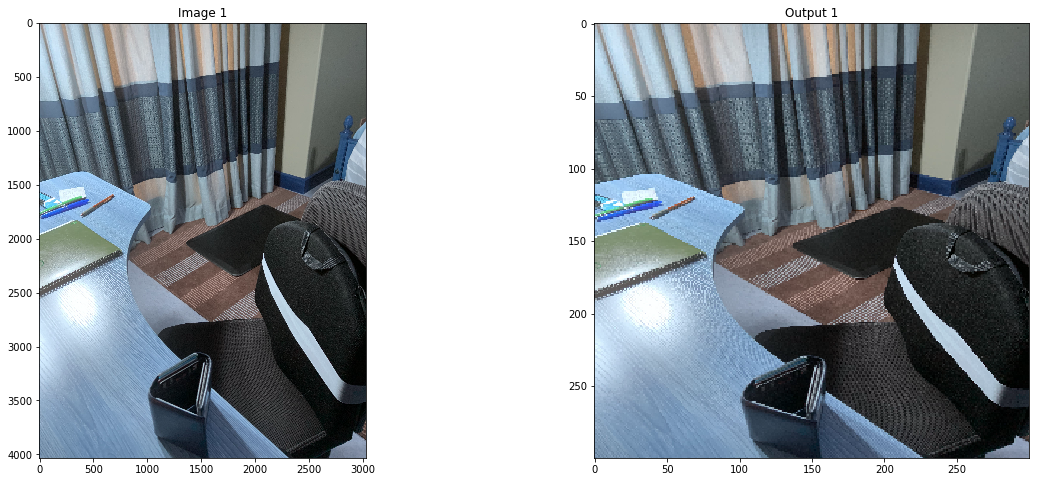

In [52]:
f_plot(img4, dst4)

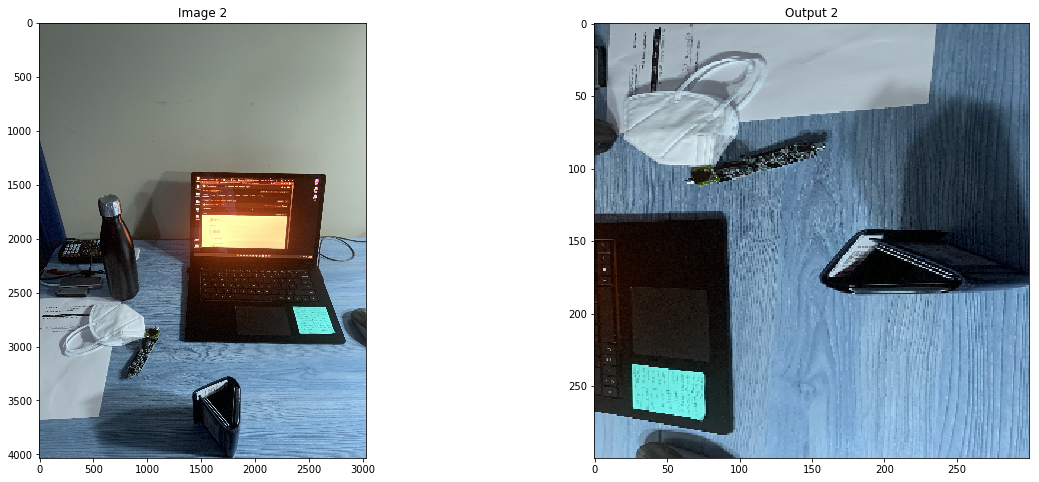

In [16]:
f_plot(img2, dst2, num=2)

## Let's try using SciPy

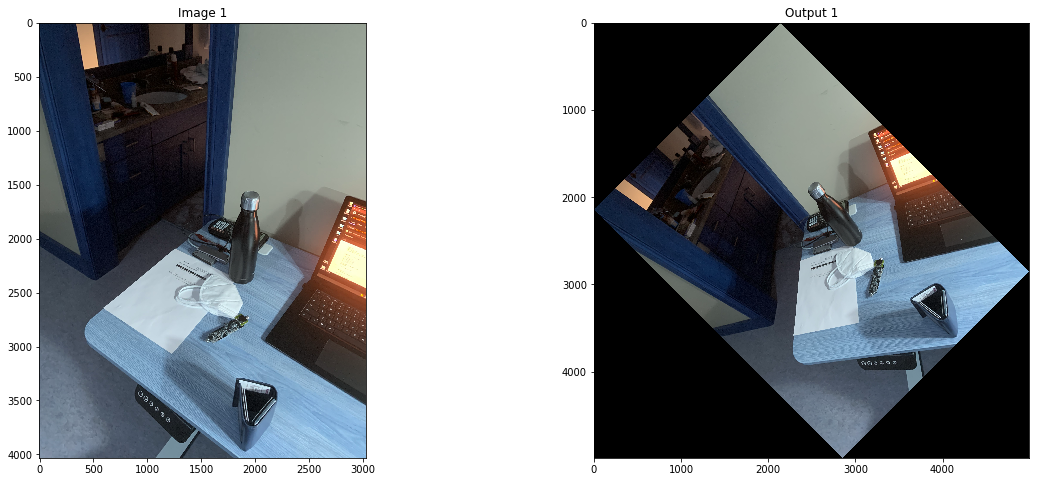

In [54]:
#rotation angle in degree
dst1 = ndimage.rotate(img1, 45)
f_plot(img1, dst1)

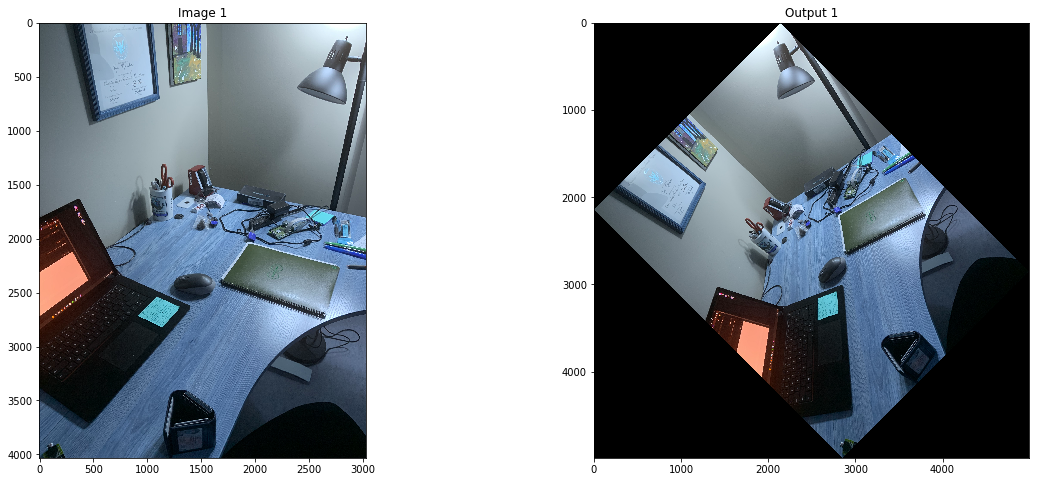

In [55]:
#rotation angle in degree
dst3 = ndimage.rotate(img3, 45)
f_plot(img3, dst3)

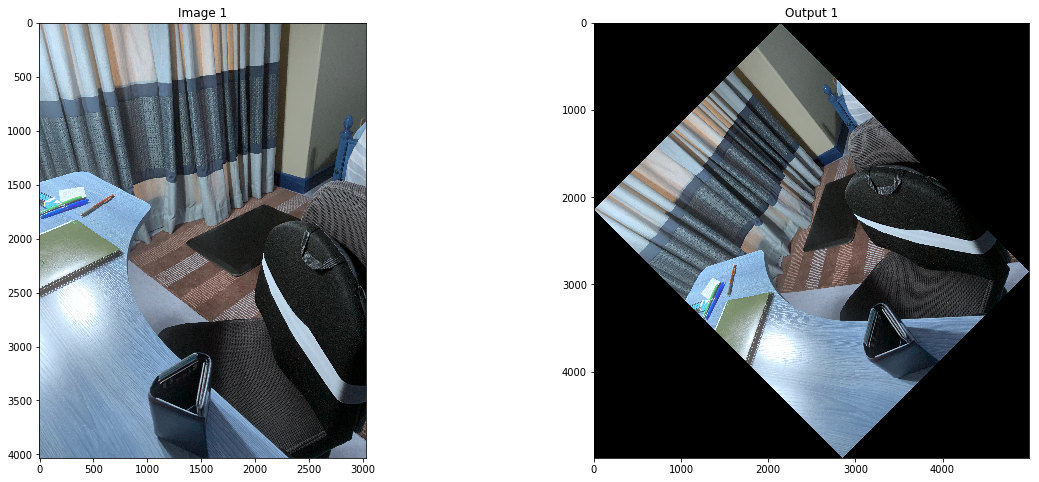

In [56]:
#rotation angle in degree
dst4 = ndimage.rotate(img4, 45)
f_plot(img4, dst4)

## Original Exploration with warpPerspective()

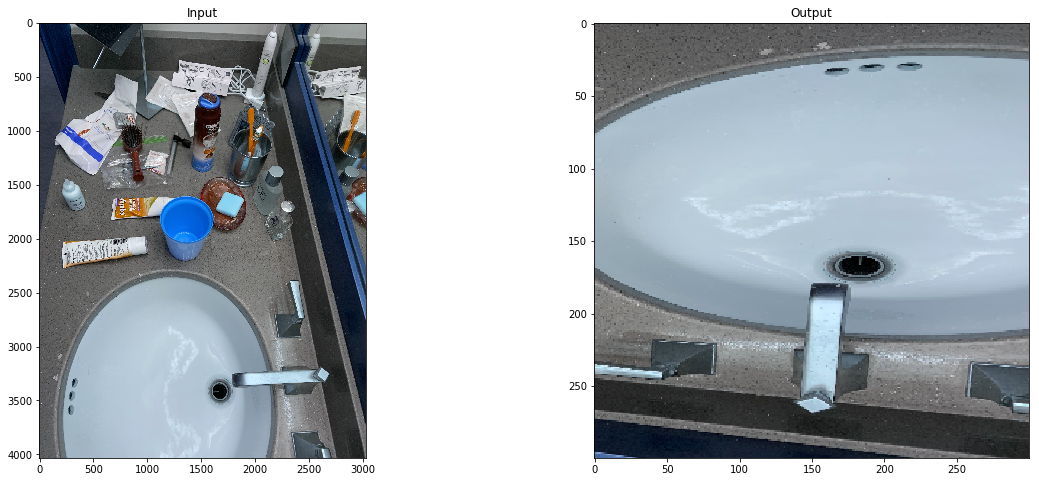

In [11]:
img = cv2.imread(image_path+s2)
rows,cols,ch = img.shape

pts1 = np.float32([[0,2500],[0,4000],[3000,2500],[3000,4000]]) 
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

In [12]:
M

array([[ 0.e+00,  2.e-01, -5.e+02],
       [ 1.e-01,  0.e+00,  0.e+00],
       [-0.e+00, -0.e+00,  1.e+00]])

When using just a rotation matrix, in this case, a 90 degree yaw rotation, transformation fails.
- Reason: wP() uses a transformation matrix and not a rotation matrix, so the last column is translation and the last row is projection, thus it only contains a 2D rotation matrix and we cannot use the 3D rotation matrix from the IMU directly.

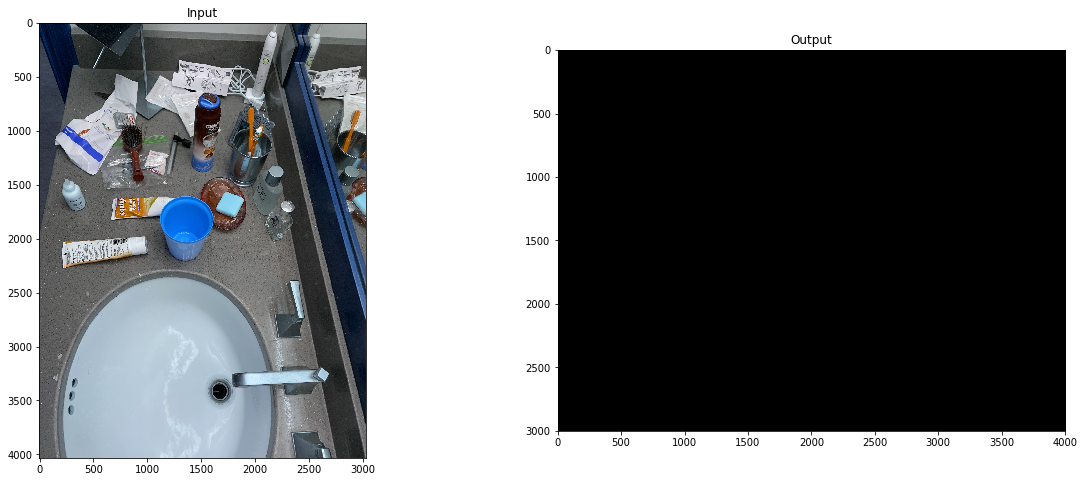

In [6]:
theta = 90
M = np.array([[0., -1., 0.],
              [1., 0., 0.],
              [0., 0., 1.]])

img = cv2.imread(image_path+s2)
rows,cols,ch = img.shape
dst = cv2.warpPerspective(img,M,(4000,3000))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

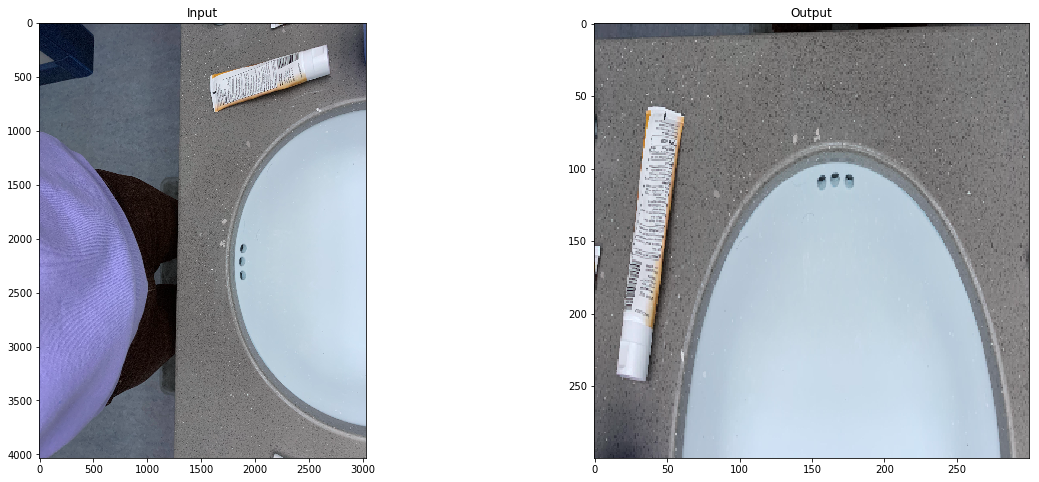

In [36]:
img = cv2.imread(image_path+b2)
rows,cols,ch = img.shape
pts1 = np.float32([[1250,0],[1250,4000],[3000,0],[3000,4000]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

In [37]:
M

array([[ 0.00000000e+00,  7.50000000e-02,  0.00000000e+00],
       [ 1.71428571e-01,  0.00000000e+00, -2.14285714e+02],
       [-0.00000000e+00, -0.00000000e+00,  1.00000000e+00]])

This time, update the above M values that are small to zero in order to see the effect

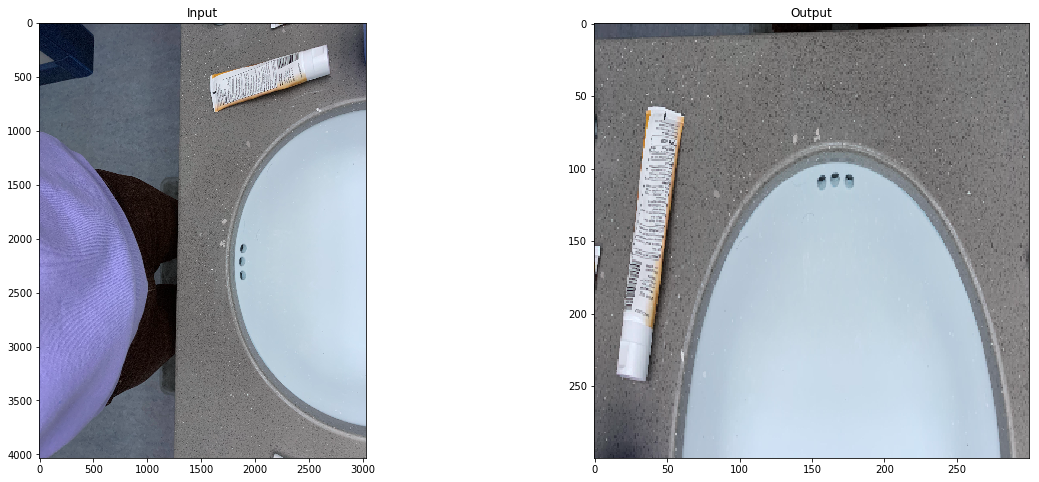

In [39]:
M_new = np.array([[ 0,  0.075,  0],
       [ 0.171428571,  0, -214.285714],
       [-0, -0,  1]])
dst = cv2.warpPerspective(img,M_new,(300,300))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(img)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()

## Now, using rotation matrices instead of manually derived points

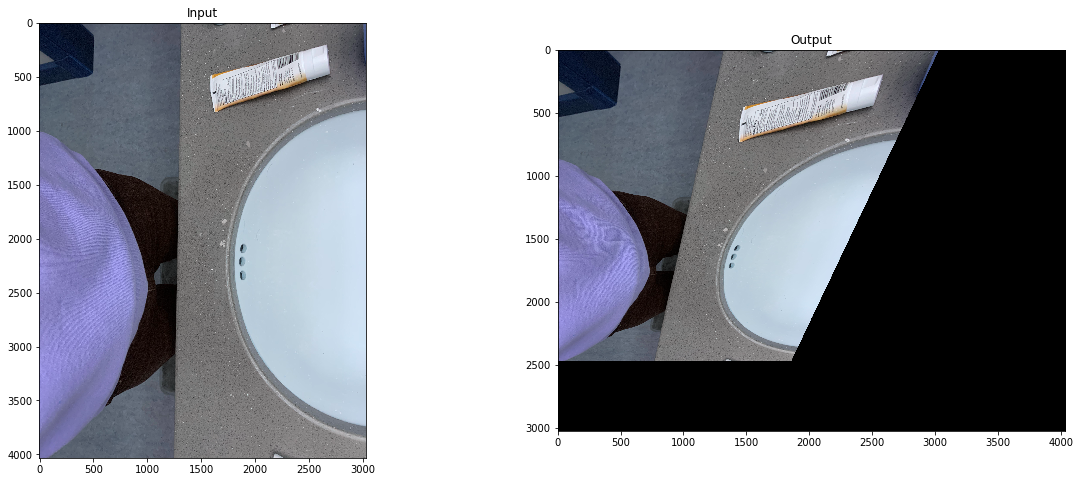

In [46]:
src = cv2.imread(image_path+b2)
rows,cols,ch = src.shape

M = R_yaw(0.009)
dst = cv2.warpPerspective(src, M, (rows,cols))

f = plt.figure(figsize=(20,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(src)
ax.set_title('Input')

ax2.imshow(dst)
ax2.set_title('Output')
plt.show()